# Section 0 问题描述与完成项目流程

## 1. 问题描述


<img src="default.png" width="20%"></img>

在该项目中，你将使用强化学习算法，实现一个自动走迷宫机器人。

1. 如上图所示，智能机器人显示在右上角。在我们的迷宫中，有陷阱（红色炸弹）及终点（蓝色的目标点）两种情景。机器人要尽量避开陷阱、尽快到达目的地。
2. 小车可执行的动作包括：向上走 `u`、向右走 `r`、向下走 `d`、向左走 `l`。
3. 执行不同的动作后，根据不同的情况会获得不同的奖励，具体而言，有以下几种情况。
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1
4. 我们需要通过修改 `robot.py` 中的代码，来实现一个 Q Learning 机器人，实现上述的目标。

## 2. 完成项目流程

1. 配置环境，使用 `envirnment.yml` 文件配置名为 `robot-env` 的 conda 环境，具体而言，你只需转到当前的目录，在命令行/终端中运行如下代码，稍作等待即可。
```
conda env create -f envirnment.yml
```
安装完毕后，在命令行/终端中运行 `source activate robot-env`（Mac/Linux 系统）或 `activate robot-env`（Windows 系统）激活该环境。

2. 阅读 `main.ipynb` 中的指导完成项目，并根据指导修改对应的代码，生成、观察结果。
3. 导出代码与报告，上传文件，提交审阅并优化。
---

---

# Section 1 算法理解


## 1. 1 强化学习总览

强化学习作为机器学习算法的一种，其模式也是让智能体在“训练”中学到“经验”，以实现给定的任务。但不同于监督学习与非监督学习，在强化学习的框架中，我们更侧重通过智能体与环境的**交互**来学习。通常在监督学习和非监督学习任务中，智能体往往需要通过给定的训练集，辅之以既定的训练目标（如最小化损失函数），通过给定的学习算法来实现这一目标。然而在强化学习中，智能体则是通过其与环境交互得到的奖励进行学习。这个环境可以是虚拟的（如虚拟的迷宫），也可以是真实的（自动驾驶汽车在真实道路上收集数据）。


在强化学习中有五个核心组成部分，它们分别是：**环境（Environment）**、**智能体（Agent）**、**状态（State）**、**动作（Action）**和**奖励（Reward）**。在某一时间节点 $t$：
    
- 智能体在从环境中感知其所处的状态 $s_t$
- 智能体根据某些准则选择动作 $a_t$
- 环境根据智能体选择的动作，向智能体反馈奖励 $r_{t+1}$

通过合理的学习算法，智能体将在这样的问题设置下，成功学到一个在状态 $s_t$ 选择动作 $a_t$ 的策略 $\pi (s_t) = a_t$。

---

**问题 1**：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习五个组成部分对应的实际对象：

<font color="blue">
    
**答案：**

[參考](https://zhuanlan.zhihu.com/p/22542101)
    
- **環境** : 
    - 陷阱, 終點, 牆壁, 可行走路徑。

- **狀態** : 
    - 用來描述Agent當前情況的抽象概念，在這裡的狀態應該只是Agent的座標。
    - 行走中，踩到陷阱，達到終點只是Agent的狀態跟環境互動產生的結果，並不是狀態。
    - 如果將行走中，踩到陷阱，達到終點當作這個問題的狀態，那麼我的Q-table就無法有效區別當agent在某個特地位置時該如何行走，因為這些不同的位置座標都被我當作成一個行走中的狀態，實際上不同的座標都應該要根據agent執行action產生對應的reward。
    
    ~~- 行走中。~~
    ~~- 踩到陷阱。~~
    ~~- 達到終點。~~

- **动作** : 
    - 上下左右行走。
    
- **奖励** : 
    - 每走1步，扣0.1分。
    - 撞到牆，扣10分。
    - 踩到陷阱，扣30分。
    - 達到終點，得50分。

</font> 

$$T(s^{'}, a, s) = P(s^{'}|a,s)$$


---

## 1.2 计算 Q 值 

在我们的项目中，我们要实现基于 Q-Learning 的强化学习算法。Q-Learning 是一个值迭代（Value Iteration）算法。与策略迭代（Policy Iteration）算法不同，值迭代算法会计算每个”状态“或是”状态-动作“的值（Value）或是效用（Utility），然后在执行动作的时候，会设法最大化这个值。因此，对每个状态值的准确估计，是我们值迭代算法的核心。通常我们会考虑**最大化动作的长期奖励**，即不仅考虑当前动作带来的奖励，还会考虑动作长远的奖励。

在 Q-Learning 算法中，我们把这个长期奖励记为 Q 值，我们会考虑每个 ”状态-动作“ 的 Q 值，具体而言，它的计算公式为：

$$
q(s_{t},a) = R_{t+1} + \gamma \times\max_a q(a,s_{t+1})
$$

也就是对于当前的“状态-动作” $(s_{t},a)$，我们考虑执行动作 $a$ 后环境给我们的奖励 $R_{t+1}$，以及执行动作 $a$ 到达 $s_{t+1}$后，执行任意动作能够获得的最大的Q值 $\max_a q(a,s_{t+1})$，$\gamma$ 为折扣因子。

不过一般地，我们使用更为保守地更新 Q 表的方法，即引入松弛变量 $alpha$，按如下的公式进行更新，使得 Q 表的迭代变化更为平缓。

$$
q(s_{t},a) = (1-\alpha) \times q(s_{t},a) + \alpha \times(R_{t+1} + \gamma \times\max_a q(a,s_{t+1}))
$$



---
<img src="default2.png" width="20%"></img>

**问题 2**：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。


已知：如上图，机器人位于 $s_1$，行动为 `u`，行动获得的奖励与题目的默认设置相同。在 $s_2$ 中执行各动作的 Q 值为：`u`: -24，`r`: -13，`d`: -0.29、`l`: +40，$\gamma$ 取0.9。


<font color="blue">
    
**答案：**

    
$$
\begin{align}
q(s_{t},a) & = R_{t+1} + \gamma \times\max_a q(a,s_{t+1}) \\
 & =(-0.1) + (0.9)*(40) \\
 & =(35.9)
\end{align}
$$


</font>


- **老師補充**


 - R_{t+1} 是小车在S1执行动作u之后得到的奖励，不是下S2执行动作R得到的奖励。
 - 这里的下标为t+1的含义是，在t的时刻执行动作a，则会在第t+1时刻得到对应的奖励 R_{t+1}。这里是 小车在 S1 执行了动作u之后，因为没有撞到墙壁，所以获得-0.1的奖励，见报告中，Section0的第一节的第三点。
 - 相应地，max_a q(a,st+1) 代表着，在 t+1 时刻，在状态 s_{t+1} 下， 对所有的动作而言，小车 q 值能够取得的最大值，也就是我们在S2下的最大的Q值。


---

## 1.3 如何选择动作

在强化学习中，「探索-利用」问题是非常重要的问题。具体来说，根据上面的定义，我们会尽可能地让机器人在每次选择最优的决策，来最大化长期奖励。但是这样做有如下的弊端：
1. 在初步的学习中，我们的 Q 值会不准确，如果在这个时候都按照 Q 值来选择，那么会造成错误。
2. 学习一段时间后，机器人的路线会相对固定，则机器人无法对环境进行有效的探索。

因此我们需要一种办法，来解决如上的问题，增加机器人的探索。由此我们考虑使用 epsilon-greedy 算法，即在小车选择动作的时候，以一部分的概率随机选择动作，以一部分的概率按照最优的 Q 值选择动作。同时，这个选择随机动作的概率应当随着训练的过程逐步减小。

---

**问题 3**：在如下的代码块中，实现 epsilon-greedy 算法的逻辑，并运行测试代码。

In [9]:
import random
import numpy as np

actions = ['u','r','d','l']
qline = {'u':1.2, 'r':-2.1, 'd':-24.5, 'l':27}

def choose_action(i_episode):
    # 选择随机动作的概率应当随着训练的过程逐步减小
    epsilon = 1.0 / (i_episode + 1)
        
    if random.random() < epsilon:
        # 一部分的概率随机选择动作
        action = np.random.choice(actions)
    else:
        # 以一部分的概率按照最优的 Q 值选择动作(這邊我的代碼跟審閱有出入，我原本代碼就是回傳u,r,d,l)
        action = actions[np.argmax(qline)]
    
    return action

In [10]:
print('action: ', choose_action(1))
print('action: ', choose_action(2))
print('action: ', choose_action(3))
print('action: ', choose_action(50))

action:  u
action:  u
action:  u
action:  u


---

---

# Section 2 代码实现

## 2.1. `Maze` 类理解

我们首先引入了迷宫类 `Maze`，这是一个非常强大的函数，它能够根据你的要求随机创建一个迷宫，或者根据指定的文件，读入一个迷宫地图信息。

1. 使用 `Maze("file_name")` 根据指定文件创建迷宫，或者使用 `Maze(maze_size=(height,width))` 来随机生成一个迷宫。
2. 使用 `trap_number` 参数，在创建迷宫的时候，设定迷宫中陷阱的数量。
3. 直接键入迷宫变量的名字按回车，展示迷宫图像（如 `g=Maze("xx.txt")`，那么直接输入 `g` 即可。
4. 建议生成的迷宫尺寸，长在 6~12 之间，宽在 10～12 之间。

---

**问题 4**：在如下的代码块中，创建你的迷宫并展示。

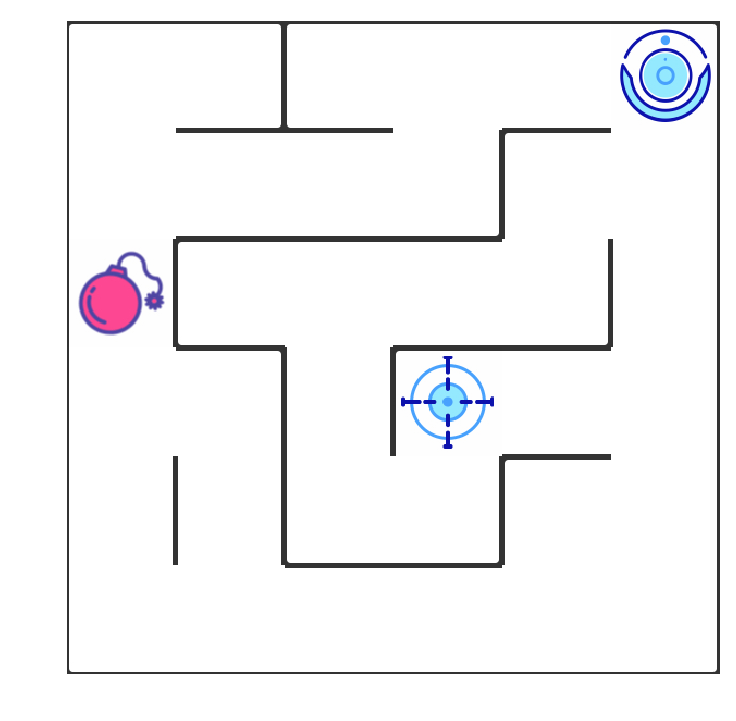

Maze of size (6, 6)

In [2]:
from Maze import Maze
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## todo: 创建迷宫并展示
maze_size = (6,6)
trap_number = 1

maze = Maze(maze_size=maze_size, trap_number=trap_number)

maze

---

你可能已经注意到，在迷宫中我们已经默认放置了一个机器人。实际上，我们为迷宫配置了相应的 API，来帮助机器人的移动与感知。其中你随后会使用的两个 API 为 `maze.sense_robot()` 及 `maze.move_robot()`。

1. `maze.sense_robot()` 为一个无参数的函数，输出机器人在迷宫中目前的位置。
2. `maze.move_robot(direction)` 对输入的移动方向，移动机器人，并返回对应动作的奖励值。

---

**问题 5**：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。

開始:  (1, 2)
結束:  (0, 5)


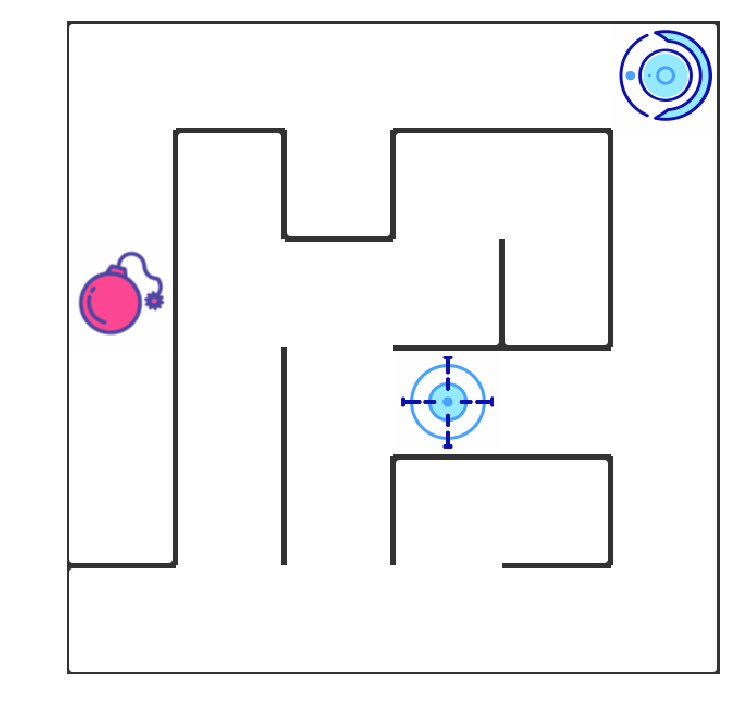

Maze of size (6, 6)

In [13]:
rewards = []

print('開始: ', maze.sense_robot())
## 循环、随机移动机器人10次，记录下奖励
for i in range(10):
    action = random.choice(actions)
    reward = maze.move_robot(action)
    rewards.append(reward)

## 输出机器人最后的位置
print('結束: ', maze.sense_robot())

## 打印迷宫，观察机器人位置
maze

## 2.2. `Robot` 类实现

`Robot` 类是我们需要重点实现的部分。在这个类中，我们需要实现诸多功能，以使得我们成功实现一个强化学习智能体。总体来说，之前我们是人为地在环境中移动了机器人，但是现在通过实现 `Robot` 这个类，机器人将会自己移动。通过实现学习函数，`Robot` 类将会学习到如何选择最优的动作，并且更新强化学习中对应的参数。

首先 `Robot` 有多个输入，其中 `alpha=0.5, gamma=0.9, epsilon0=0.5` 表征强化学习相关的各个参数的默认值，这些在之前你已经了解到，`Maze` 应为机器人所在迷宫对象。

随后观察 `Robot.update` 函数，它指明了在每次执行动作时，`Robot` 需要执行的程序。按照这些程序，各个函数的功能也就明了了。

最后你需要实现 `Robot.py` 代码中的8段代码，他们都在代码中以 `#TODO` 进行标注，你能轻松地找到他们。

---

**问题 6**：实现 `Robot.py` 中的8段代码，并运行如下代码检查效果（记得将 `maze` 变量修改为你创建迷宫的变量名）。



('r', -10.0)


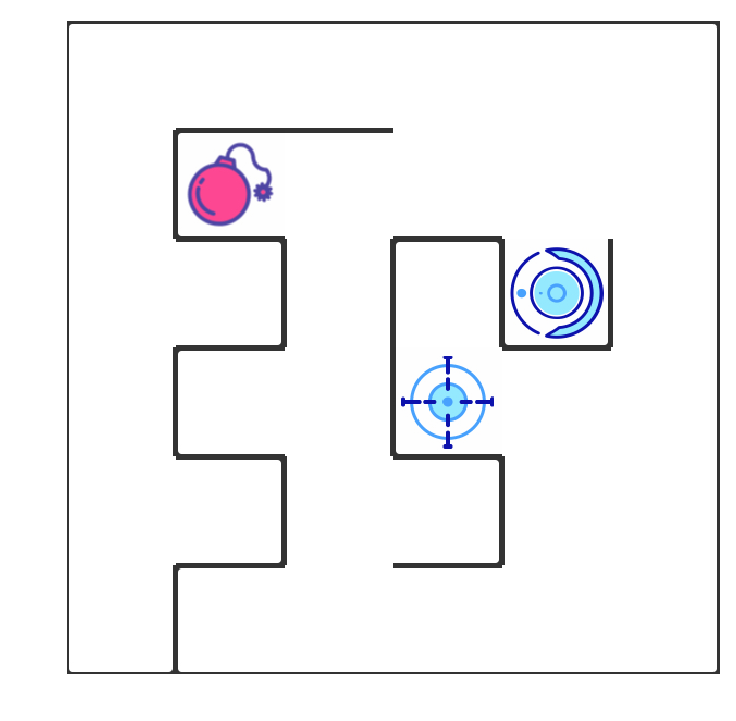

Maze of size (6, 6)

In [5]:
from Robot import Robot
robot = Robot(maze) # 记得将 maze 变量修改为你创建迷宫的变量名
robot.set_status(learning=True,testing=False)
print(robot.update())

maze

---

## 2.3 用 `Runner` 类训练 Robot

在实现了上述内容之后，我们就可以开始对我们 `Robot` 进行训练并调参了。我们为你准备了又一个非常棒的类 `Runner`，来实现整个训练过程及可视化。使用如下的代码，你可以成功对机器人进行训练。并且你会在当前文件夹中生成一个名为 `filename` 的视频，记录了整个训练的过程。通过观察该视频，你能够发现训练过程中的问题，并且优化你的代码及参数。

---

**问题 7**：尝试利用下列代码训练机器人，并进行调参。可选的参数包括：

<font color="blue">
    
**答案：**

- `epoch`: 訓練參數
     - 是針對階段性任務所具有的參數。
     - Agent達到terminal state中間可能經過個任意個steps。
     - epoch次數越多，robot就有機會到達各種不同的state(迷宮中不同的位置)，讓Qtable更加完整，訓練出來效果也會越好。

- `epsilon`: greedy-epsilon方法中的參數
    - Agent在epoch剛開始時，於環境互動是傾向探索環境，而不是利用已有的經驗。
    - 隨著epoch的次數增多，Agent不應該在是探索環境，而是傾向自身學習到的經驗，嘗試去找出最大化reward的action。
    - epsilon是介於1~0之間，要隨著epoch次數逐漸遞減。
    
- `alpha`: 學習衡量參數
    - Q = (1-alpha)*Q_old + alpha*Q_current
    - alpha越低，表示agent只在乎之前的學習的結果(Q_old所佔的比例越大)，而不能累積新的知識(Q_old所佔的比例越小)
    - 設置0.5來均衡Q_old和Q_current，讓之前的學習的結果跟新學習知識是佔相同的比重進行累積。
    
- `gamma`: 折扣回報參數
    - 折扣率越大，越關心長遠未來可能拿到的reward。
    - 折扣率越小，越關心當前的reward。
    - gamma是介於1~0之間，設置0.9表示agent要更關心長遠未來可能拿到的reward，而不僅只是考慮當下所得到reward。
    
</font>


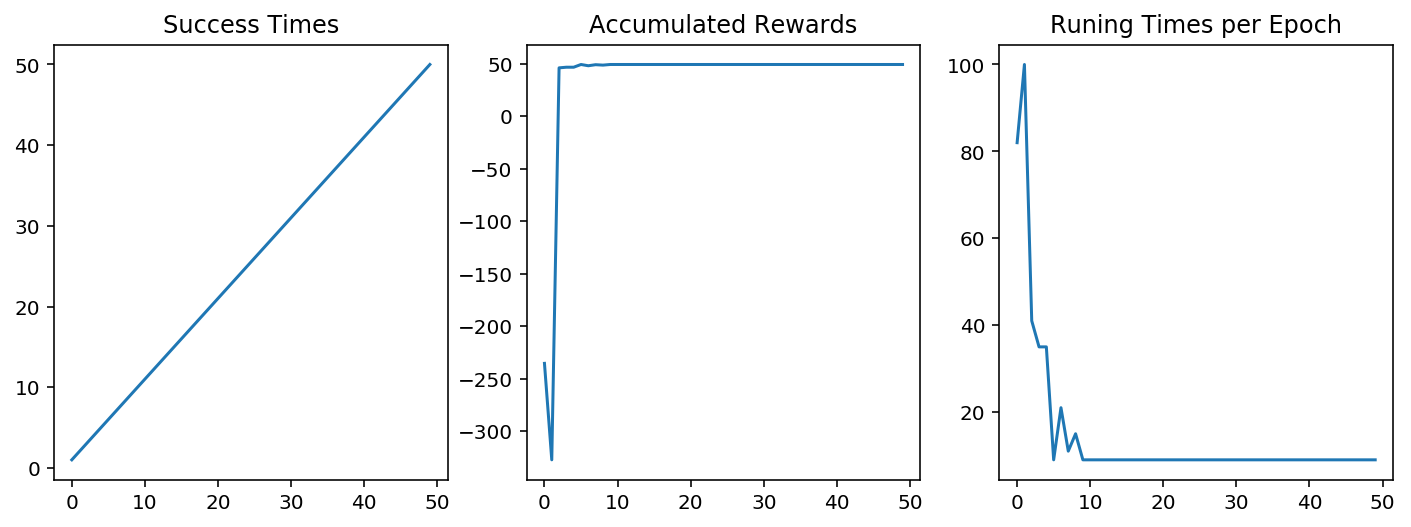

In [15]:
from Maze import Maze
from Robot import Robot
from Runner import Runner

epoch = 50

epsilon0 = 0.7
alpha = 0.5
gamma = 0.9

maze_size = (6,6)
trap_number = 3

maze = Maze(maze_size=maze_size, trap_number=trap_number)
robot = Robot(maze, alpha=alpha, epsilon0=epsilon0, gamma=gamma)
robot.set_status(learning=True)

runner = Runner(robot, maze)
runner.run_training(epoch, display_direction=True)
#runner.generate_movie(filename = "final.avi") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。

runner.plot_results()

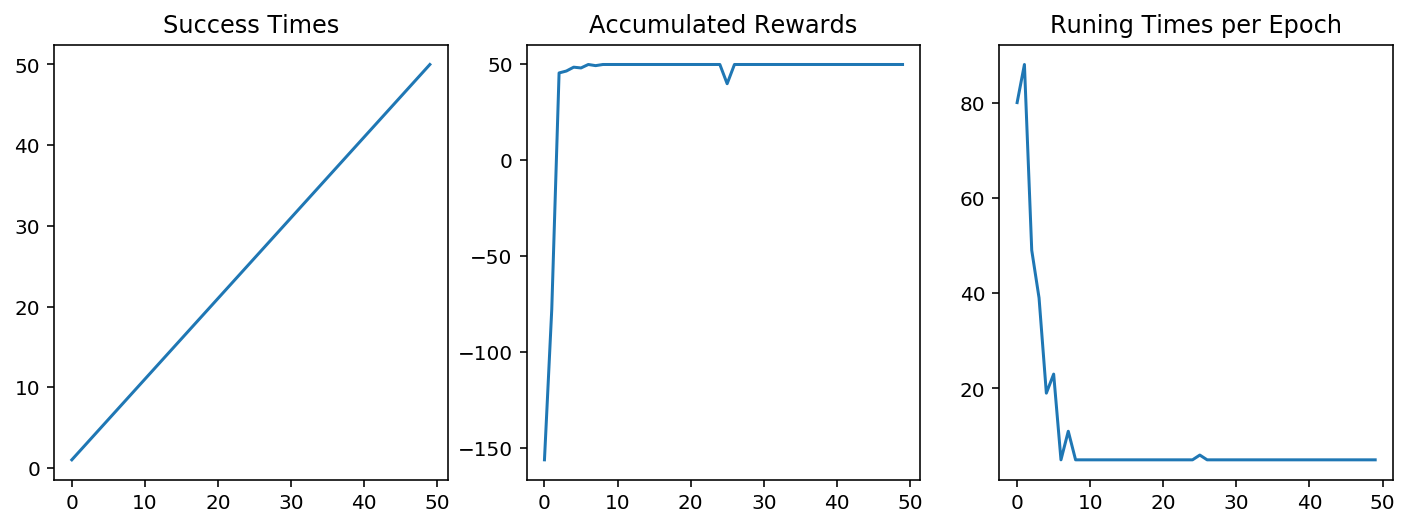

In [16]:
# 比較alpha = 0.1

epsilon0 = 0.7
alpha = 0.1
gamma = 0.9

maze = Maze(maze_size=maze_size, trap_number=trap_number)
robot = Robot(maze, alpha=alpha, epsilon0=epsilon0, gamma=gamma)
robot.set_status(learning=True)

runner = Runner(robot, maze)
runner.run_training(epoch, display_direction=True)

runner.plot_results()

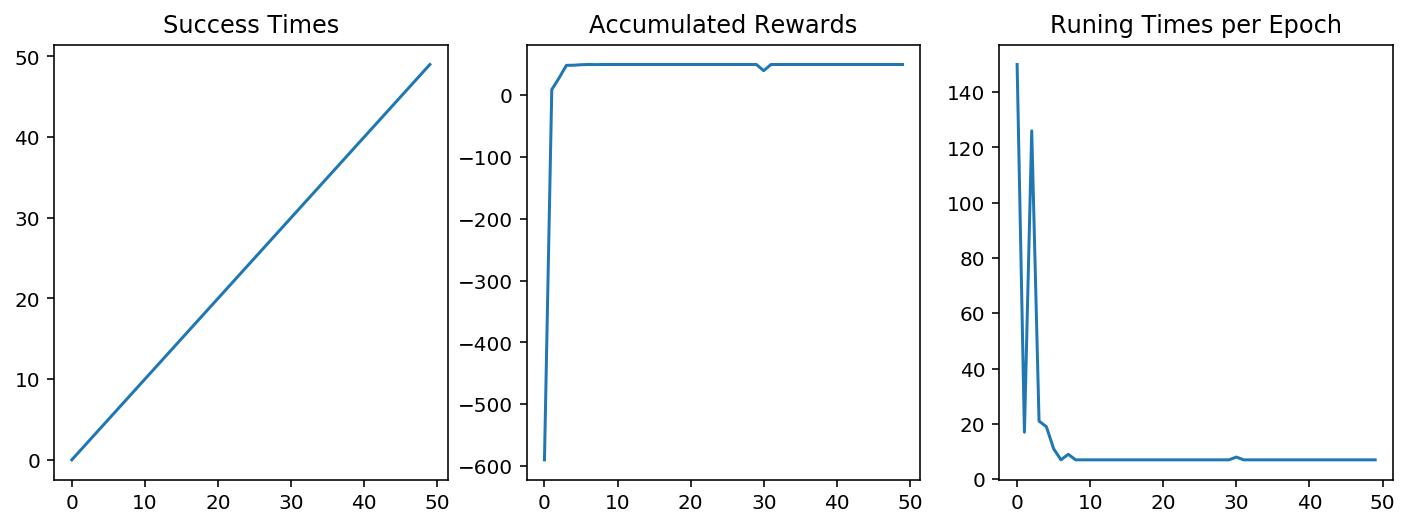

In [17]:
# 比較alpha = 0.1

epsilon0 = 0.7
alpha = 0.9
gamma = 0.9

maze = Maze(maze_size=maze_size, trap_number=trap_number)
robot = Robot(maze, alpha=alpha, epsilon0=epsilon0, gamma=gamma)
robot.set_status(learning=True)

runner = Runner(robot, maze)
runner.run_training(epoch, display_direction=True)

runner.plot_results()

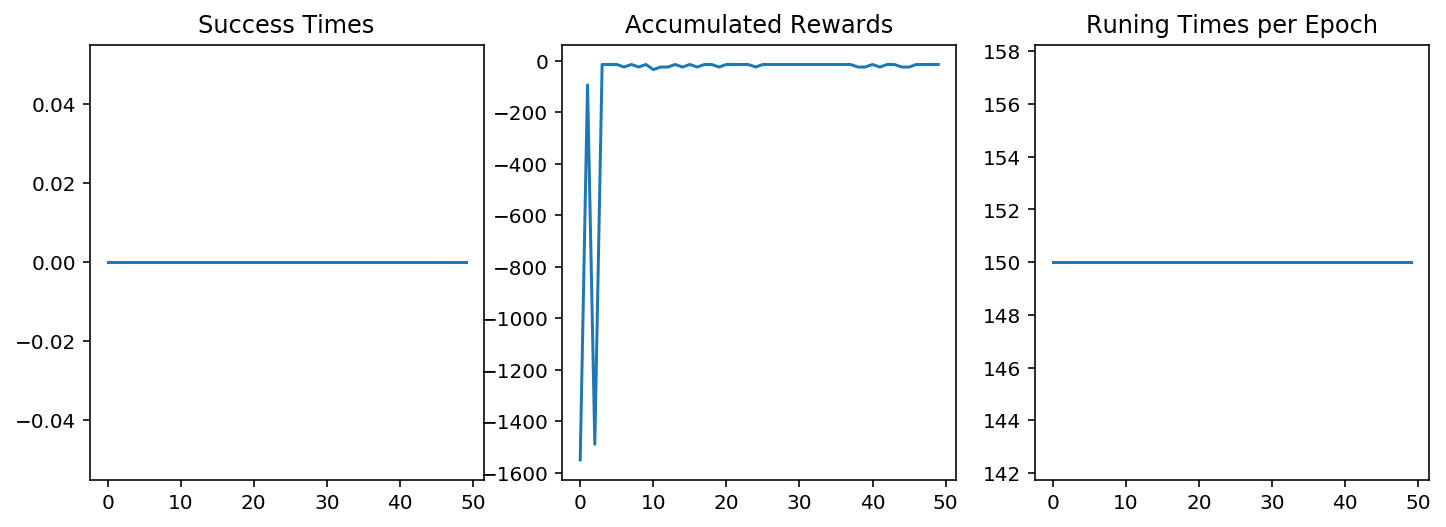

In [18]:
# 比較gamma = 0.1

epsilon0 = 0.7
alpha = 0.5
gamma = 0.1

maze = Maze(maze_size=maze_size, trap_number=trap_number)
robot = Robot(maze, alpha=alpha, epsilon0=epsilon0, gamma=gamma)
robot.set_status(learning=True)

runner = Runner(robot, maze)
runner.run_training(epoch, display_direction=True)

runner.plot_results()

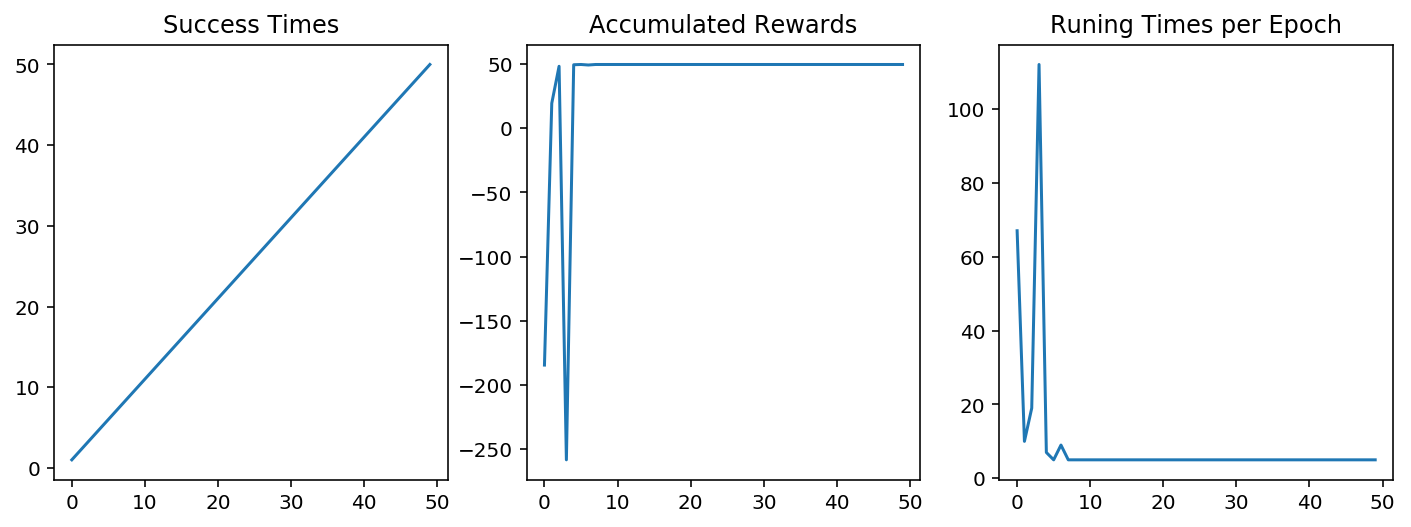

In [19]:
# 比較gamma = 0.5

epsilon0 = 0.7
alpha = 0.5
gamma = 0.5

maze = Maze(maze_size=maze_size, trap_number=trap_number)
robot = Robot(maze, alpha=alpha, epsilon0=epsilon0, gamma=gamma)
robot.set_status(learning=True)

runner = Runner(robot, maze)
runner.run_training(epoch, display_direction=True)

runner.plot_results()

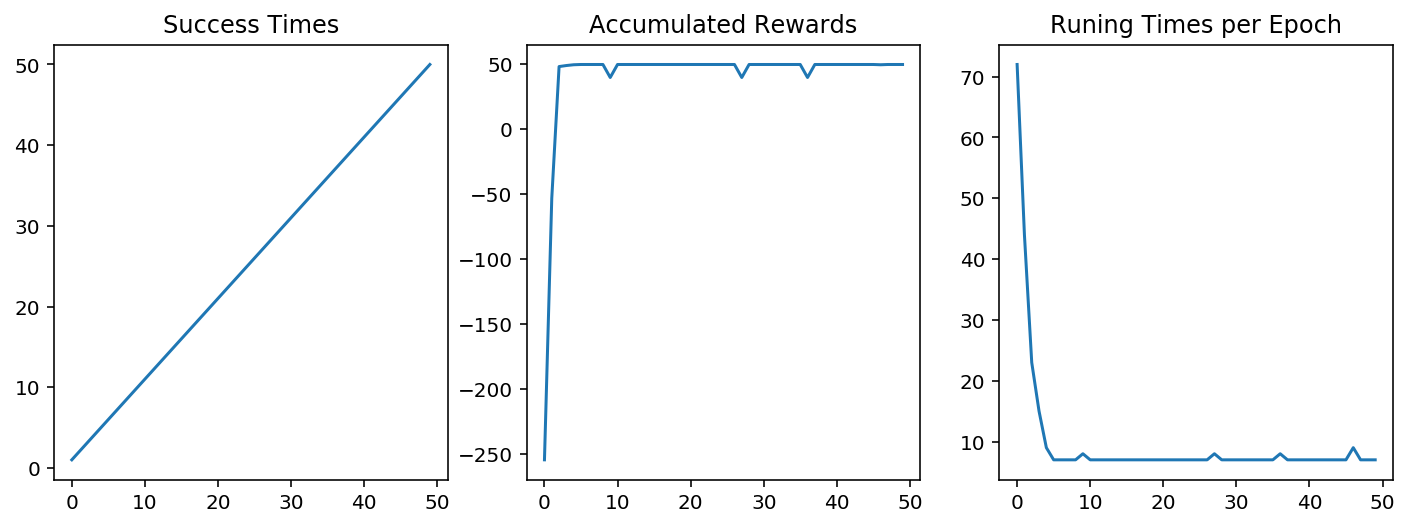

In [20]:
# 比較epsilon = 0.1

epsilon0 = 0.1
alpha = 0.5
gamma = 0.9

maze = Maze(maze_size=maze_size, trap_number=trap_number)
robot = Robot(maze, alpha=alpha, epsilon0=epsilon0, gamma=gamma)
robot.set_status(learning=True)

runner = Runner(robot, maze)
runner.run_training(epoch, display_direction=True)

runner.plot_results()

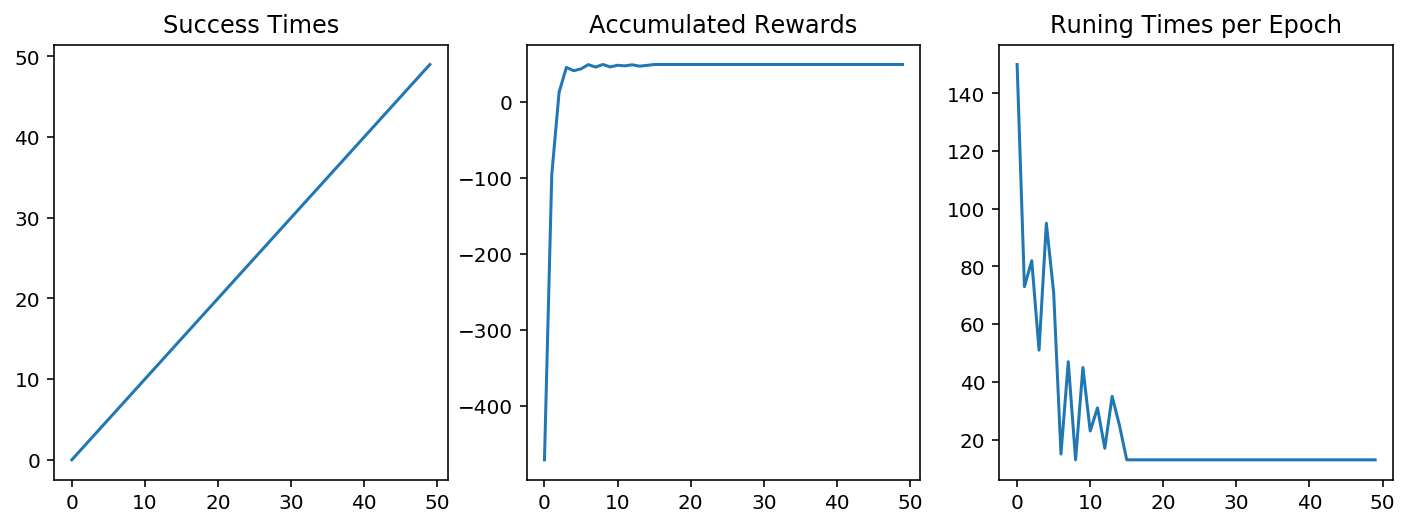

In [22]:
# 比較epsilon = 0.9

epsilon0 = 0.9
alpha = 0.5
gamma = 0.9

maze = Maze(maze_size=maze_size, trap_number=trap_number)
robot = Robot(maze, alpha=alpha, epsilon0=epsilon0, gamma=gamma)
robot.set_status(learning=True)

runner = Runner(robot, maze)
runner.run_training(epoch, display_direction=True)

runner.plot_results()

---

使用 `runner.plot_results()` 函数，能够打印机器人在训练过程中的一些参数信息。

- Success Times 代表机器人在训练过程中成功的累计次数，这应当是一个累积递增的图像。
- Accumulated Rewards 代表机器人在每次训练 epoch 中，获得的累积奖励的值，这应当是一个逐步递增的图像。
- Running Times per Epoch 代表在每次训练 epoch 中，小车训练的次数（到达终点就会停止该 epoch 转入下次训练），这应当是一个逐步递减的图像。

---

**问题 8**：使用 `runner.plot_results()` 输出训练结果，根据该结果对你的机器人进行分析。

- 指出你选用的参数如何，选用参数的原因。
- 建议你比较不同参数下机器人的训练的情况。
- 训练的结果是否满意，有何改进的计划。

<font color="blue">

**答案：**

- 指出你选用的参数如何，选用参数的原因。
    - alpha = 0.5，來均衡之前跟現在的學習結果。
    - gamma = 0.9，讓robot不要只僅僅可慮當前的獎勵，而是要考慮執行這個動作後的未來獎勵。 
    - epsilon0 = 0.7，希望剛開始robot有機會多進行探索。

- 建议你比较不同参数下机器人的训练的情况。
    - 當alpha分別設置0.1, 0.5, 0.9時，alpha = 0.5時所產生的reward結果是相對穩定，0.1跟0.9都reward曲線都有一個小幅度的跌幅。
    - 當gamma分別設置0.1, 0.5, 0.9時，gamma越小，agent在50次epoch都無法達到終點，隨著gamma越大，agent越可以順利達到終點。
    - 當epsilon分別設置0.1, 0.7, 0.9時，當epsilon在0.7時，所產生的reweards相對較高，也比較穩定。

- 训练的结果是否满意，有何改进的计划。
    - 也許可以嘗試“預期Sarsa”，利用不同的方式來更新Qtable(所有動作的機率跟對應的reward進行內積)。

</font>

---

**问题 9：** 请将如下的文件打包，提交文件给审阅者。

- `robot.py`
- `robot_maze.ipynb`
- 由 `robot_maze.ipynb` 导出的 `robot_maze.html`